In [1]:
import numpy as np
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from neurodiffeq import diff      
from neurodiffeq.ode import IVP, solve_system, Monitor, ExampleGenerator
from neurodiffeq.networks import FCNN, SinActv 

In [2]:
torch.set_default_tensor_type('torch.DoubleTensor')

In [3]:
FROM, TO = 0., 5.
N_NODE = 8
TRAIN_SIZE = 32 
VALID_SIZE = 10
MAX_EPOCHS = 10000

<IPython.core.display.Javascript object>


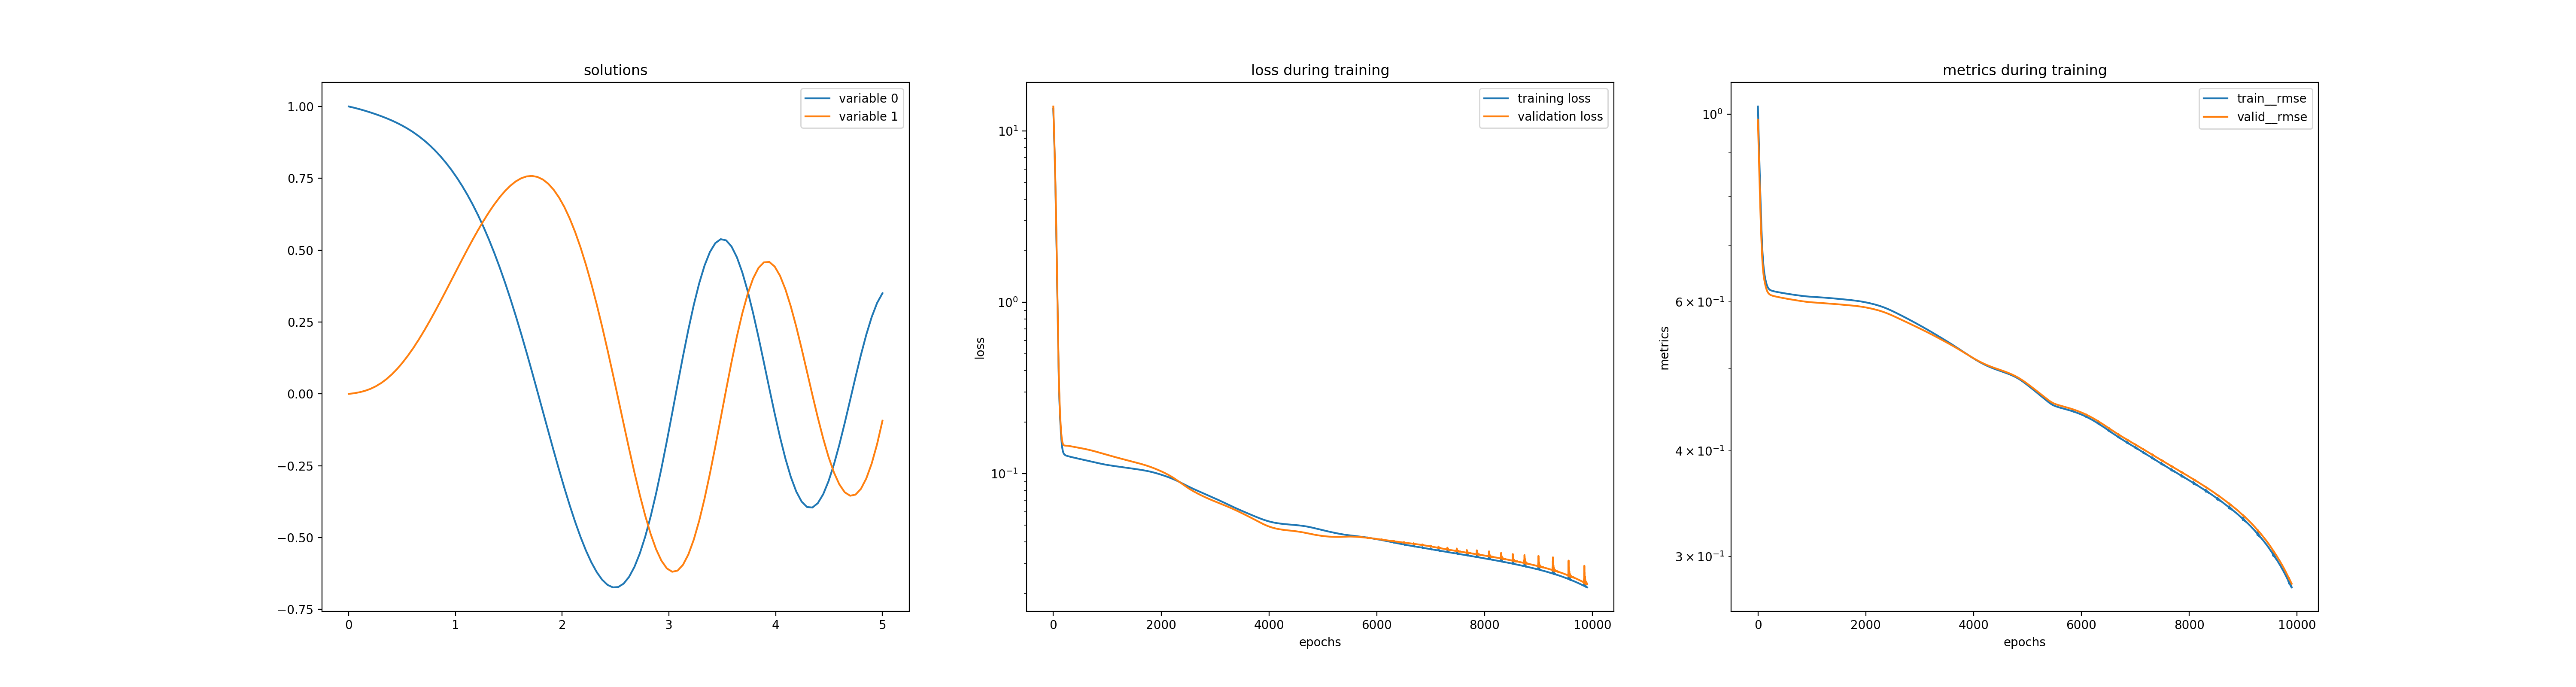

In [4]:
%matplotlib notebook

odes = lambda x, y, t : [diff(x, t) + t*y,
                         diff(y, t) - t*x]

ivps = [
    IVP(t_0=0., x_0=1.),
    IVP(t_0=0., x_0=0.)
]

nets = [
    FCNN(n_hidden_units=N_NODE, n_hidden_layers=1, actv=SinActv),
    FCNN(n_hidden_units=N_NODE, n_hidden_layers=1, actv=SinActv)
]

train_gen = ExampleGenerator(TRAIN_SIZE, t_min=FROM, t_max=TO, method='equally-spaced')
valid_gen = ExampleGenerator(VALID_SIZE, t_min=FROM, t_max=TO, method='equally-spaced')

def rmse(x, y, t):
    true_x = torch.cos(t**2/2)
    true_y = torch.sin(t**2/2)
    x_sse = torch.sum((x - true_x) ** 2)
    y_sse = torch.sum((y - true_y) ** 2)
    return torch.sqrt( (x_sse+y_sse)/(len(x)+len(y)) )

solution, _ = solve_system(
    ode_system=odes, 
    conditions=ivps, 
    t_min=FROM, t_max=TO,
    nets=nets,
    train_generator=train_gen,
    valid_generator=valid_gen,
    batch_size=TRAIN_SIZE,
    max_epochs=MAX_EPOCHS,
    monitor=Monitor(t_min=FROM, t_max=TO, check_every=100),
    metrics={'rmse': rmse}
)